In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Loan_default.csv')

data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
data.drop('LoanID',axis=1,inplace=True)
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [6]:
cat = data.select_dtypes(include='object').columns

In [7]:
cat

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [8]:
data['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [9]:
le = LabelEncoder()

In [10]:
for i in cat:
    data[i] = le.fit_transform(data[i])

In [11]:
data.head(4)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0


In [12]:
sc = StandardScaler()
data[['Income','LoanAmount']] = sc.fit_transform(data[['Income','LoanAmount']])

In [13]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,0.089693,-1.086833,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,-0.823021,-0.044309,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,0.043854,0.022715,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,-1.303452,-1.168538,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,-1.592855,-1.671921,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [14]:
data.dtypes

Age                 int64
Income            float64
LoanAmount        float64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
Default             int64
dtype: object

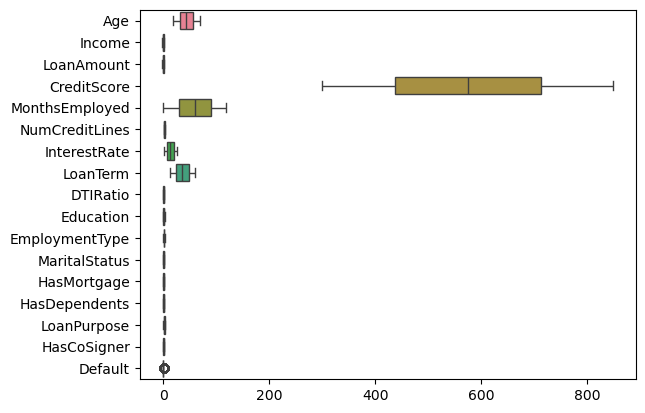

In [15]:
sns.boxplot(data=data,orient='h')
plt.show();

In [17]:
data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [22]:
X_c = data[['Age', 'Income', 'LoanAmount', 'CreditScore','InterestRate','MaritalStatus','LoanPurpose']]
y_c = data[['Default']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
c_X_train,c_X_test,c_y_train,c_y_test = train_test_split(X_c,y_c,test_size=0.2)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
ABC = AdaBoostClassifier( n_estimators=50,learning_rate=1.0,random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

ABC = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ABC, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(c_X_train, c_y_train)

print("✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}


In [30]:
ABC = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 200)
ABC.fit(c_X_train,c_y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [31]:
c_y_pred = ABC.predict(c_X_test)

In [32]:
c_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(c_y_test,c_y_pred)

0.8851772077540631

In [38]:
import pickle
with open("loan_default_model.pkl", "wb") as file:
    pickle.dump(ABC, file)

print("✅ Model saved!")

✅ Model saved!
